<a href="https://colab.research.google.com/github/ZohanaZuthi/Machine_Learning_Algorithm_Udemy/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Principal Component Analysis (PCA) in Machine Learning  

#### **What is PCA?**  
Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning to transform high-dimensional data into a lower-dimensional space while retaining as much variance (information) as possible.  

#### **How Does PCA Work?**  
PCA follows these steps:  

1. **Standardize the Data**  
   - Since PCA is sensitive to scale, data is standardized (mean = 0, variance = 1).  

2. **Compute the Covariance Matrix**  
   - This matrix captures the relationships between different features.  

3. **Compute Eigenvalues and Eigenvectors**  
   - Eigenvectors represent the directions of the new feature space (principal components).  
   - Eigenvalues indicate the amount of variance each principal component captures.  

4. **Select the Principal Components**  
   - The components with the highest eigenvalues are chosen to retain the most variance.  

5. **Transform the Data**  
   - The original data is projected onto the selected principal components, reducing its dimensionality.  

#### **Why Use PCA?**  
- **Reduces computational complexity** for machine learning models.  
- **Removes multicollinearity** by transforming correlated features into independent ones.  
- **Improves visualization** for high-dimensional data.  
- **Enhances model performance** by eliminating noise and redundant features.  

Would you like a practical Python example of PCA implementation?

## Importing the Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Dataset**

In [ ]:
dataset=pd.read_csv('Wine.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## **Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **Applying PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
# generally it is 2
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

## **Training with logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


LogisticRegression(random_state=0)

## **Making the confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## **Visualising the Training Set**

<ipython-input-21-dcbaaf9cb35d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


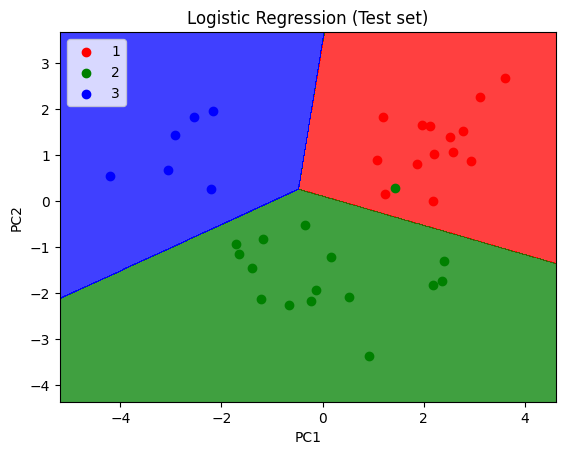

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()